# Lab: Further Exploration

```yaml
Course:   DS 5001 Exploratory Text Analytics
Module:   01 Getting Started
Topic:    Lab: Further Exploration
Author:   R.C. Alvarado
Date:     17 October 2022 (revised)
```



## Purpose

We continue exploring the Gutenberg text, looking at simple word dispersion plots and correlations.

## Set Up

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
sns.set()

In [43]:
import configparser
config = configparser.ConfigParser()

In [44]:
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

## Retrieve Work

In [45]:
K = pd.read_csv(f"{output_dir}/M01-ff-TOKENS.csv")[['term_str']]
V = pd.read_csv(f"{output_dir}/M01-ff-VOCAB.csv").set_index('term_str')

## Word Dispersion Plots

We create a simple dispersion plot to show the distribution of words over narrative time.


In [46]:
K.head()

,term_str
0,the
1,project
2,gutenberg
3,ebook
4,of


# Project tokens onto feature space

In [47]:
# Another (slower) way to do it
# K['n'] = 1
# K.reset_index().set_index(['index','term_str']).unstack().T.fillna(0)

In [48]:
D = pd.get_dummies(K.term_str, dtype='int')

In [49]:
D

,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
D.sum().sort_values() # Another way to create the vocabulary

joyous         1
loving         1
lowering       1
lowest         1
loyalty        1
            ... 
a           1648
of          2684
and         2851
to          2862
the         3501
Length: 6332, dtype: int64

In [51]:
D.sum(axis=1).sort_values() # Each is 1 because one-hot encoding

85497    0
83396    0
83395    0
72       0
83405    0
        ..
28766    1
28765    1
28764    1
28772    1
86306    1
Length: 86307, dtype: int64

In [14]:
D.T.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,86297,86298,86299,86300,86301,86302,86303,86304,86305,86306
could,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
contemplation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
saleable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
surname,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apartment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


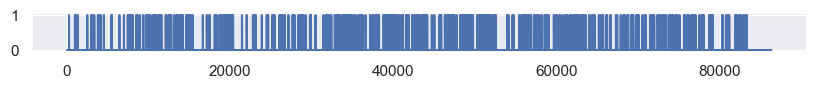

In [15]:
D['anne'].plot(figsize=(10, .5));

In [16]:
def word_plot(term_str):
    term_str = term_str.lower()
    D[term_str].plot(figsize=(10, .5), legend=False, title=term_str.upper());

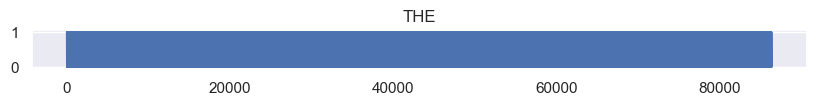

In [17]:
word_plot('the')

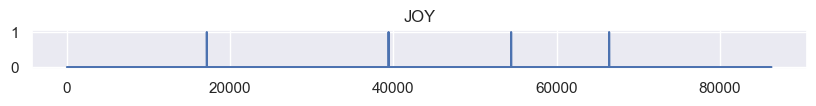

In [18]:
word_plot('joy')

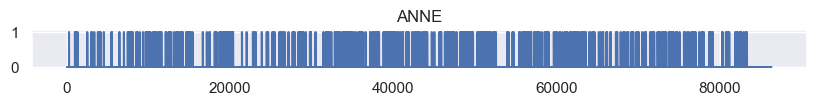

In [19]:
word_plot('anne')

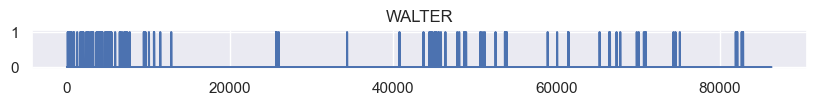

In [20]:
word_plot('walter')

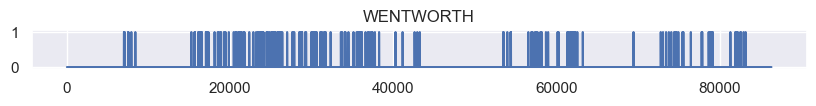

In [21]:
word_plot('wentworth')

## Correlation Graphs

We chunk narrative time into 100 segments of equal length (centiles). 

Then we count how many times each word appears in each centile.

Then we compare plots for pairs of words.

In [18]:
K['centile'] = (K.index * 100 / len(K)).astype('int') + 1

In [19]:
# K.centile.value_counts().value_counts() # View chunk sizes

In [20]:
M = [None, None]
M[0] = K.groupby(['centile','term_str']).term_str.count().unstack(fill_value=0)
M[1] = M[0] / M[0].sum()

In [328]:
# M[1].sum(1).plot(figsize=(20,5));

In [21]:
M[1].T.sample(10)

centile,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
term_str,,,,,,,,,,,,,,,,,,,,,
perseverance,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.5,0.0
wisdom,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
noncommissioned,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
abominate,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
envy,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
parted,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
incapable,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
quicker,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
mamma,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


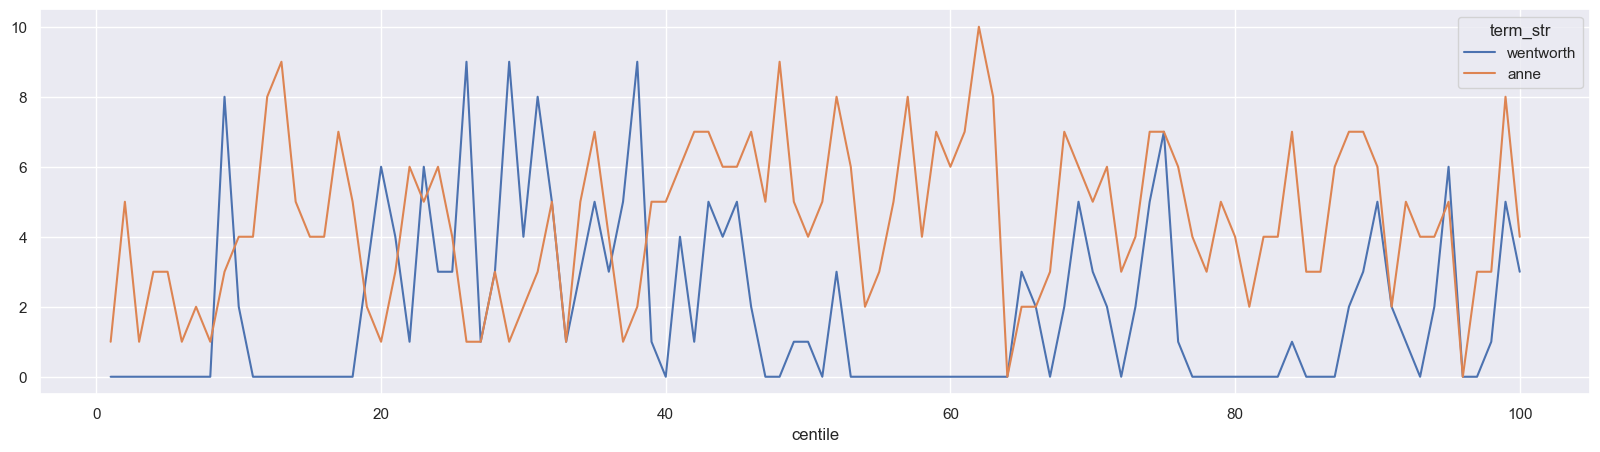

In [329]:
M[0][['wentworth','anne']].plot(figsize=(20,5), style='-');

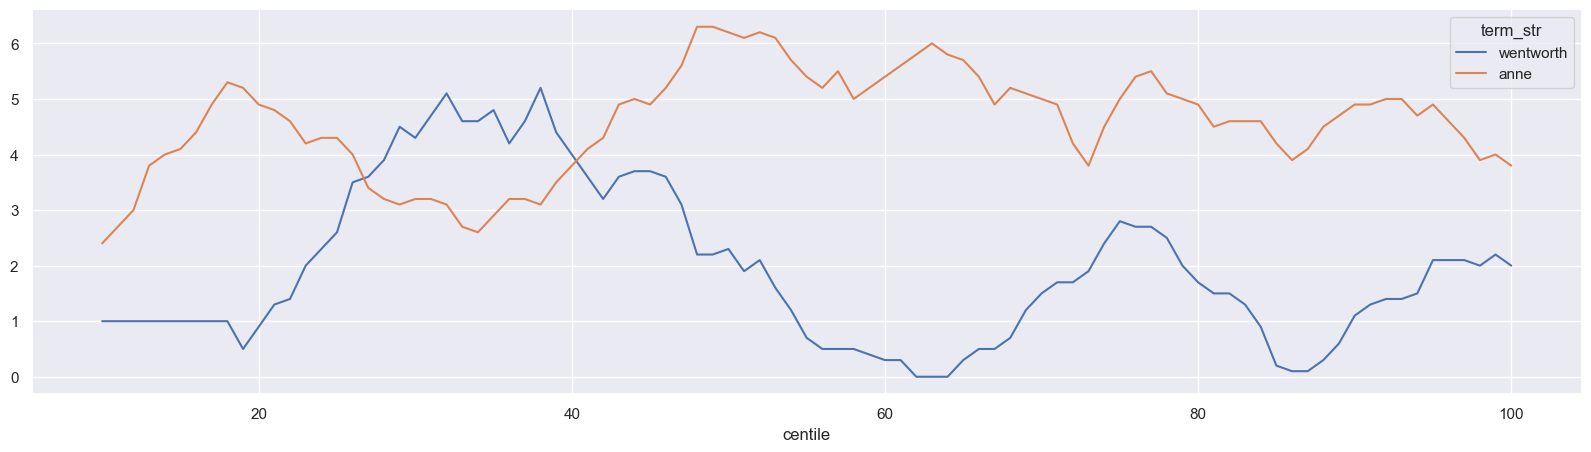

In [330]:
M[0][['wentworth','anne']].rolling(10).mean().plot(figsize=(20,5));

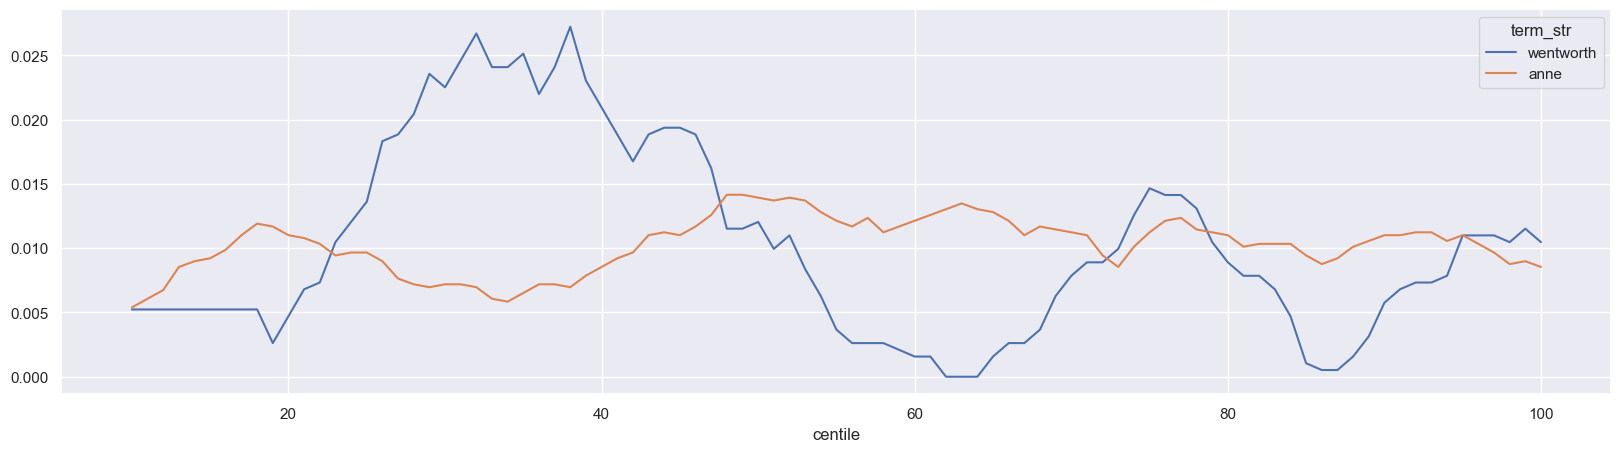

In [331]:
M[1][['wentworth','anne']].rolling(10).mean().plot(figsize=(20,5));

In [332]:
def plot_words(words, rolling=True, w=10, norm=1):
    config = {
        'figsize': (20, 5),
        'title': f"{', '.join(words).upper()} (norm={norm})"
    }
    if rolling:
        M[norm][words].rolling(w).mean().plot(**config);
    else:
        M[norm][words].plot(**config);

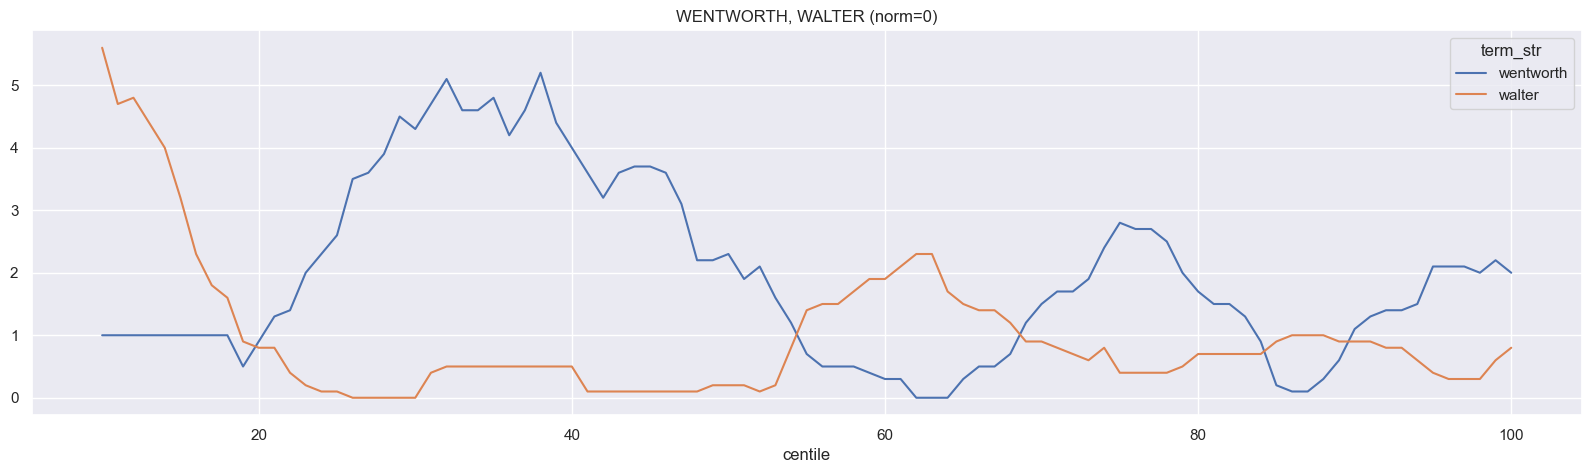

In [333]:
plot_words(['wentworth','walter'], norm=0)

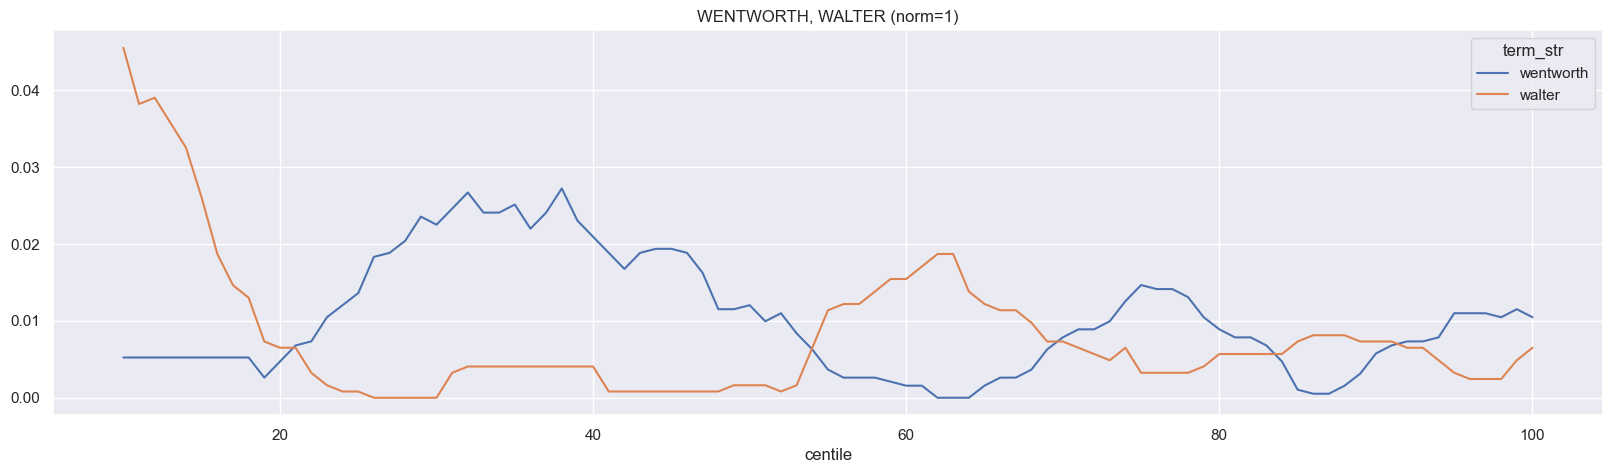

In [334]:
plot_words(['wentworth','walter'])

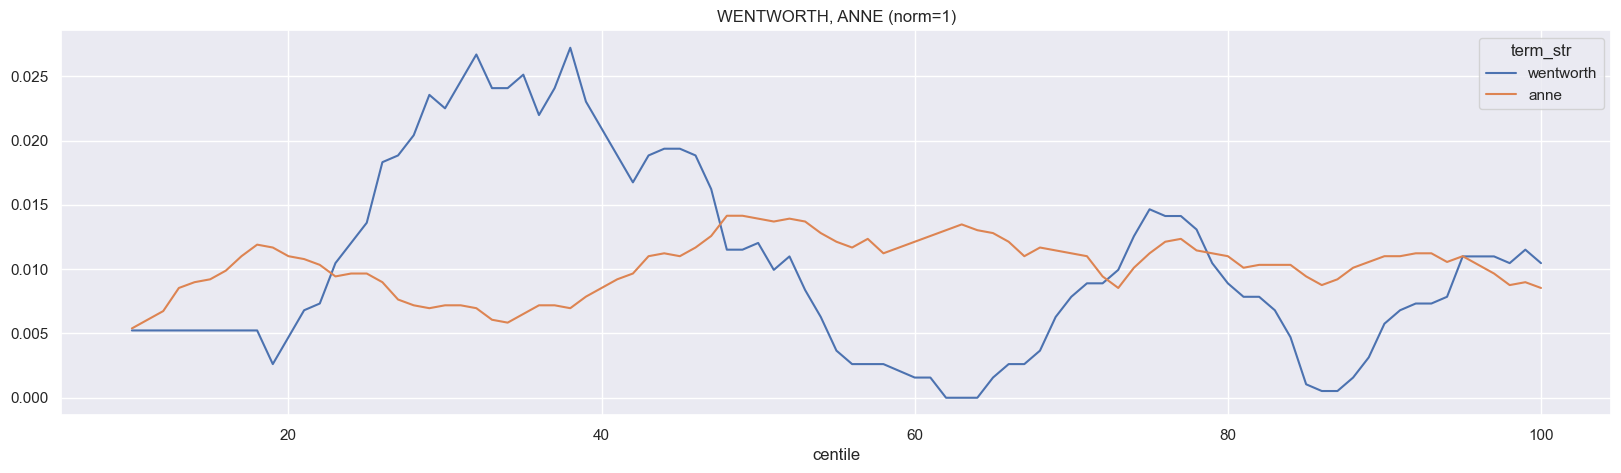

In [335]:
plot_words(['wentworth','anne'])

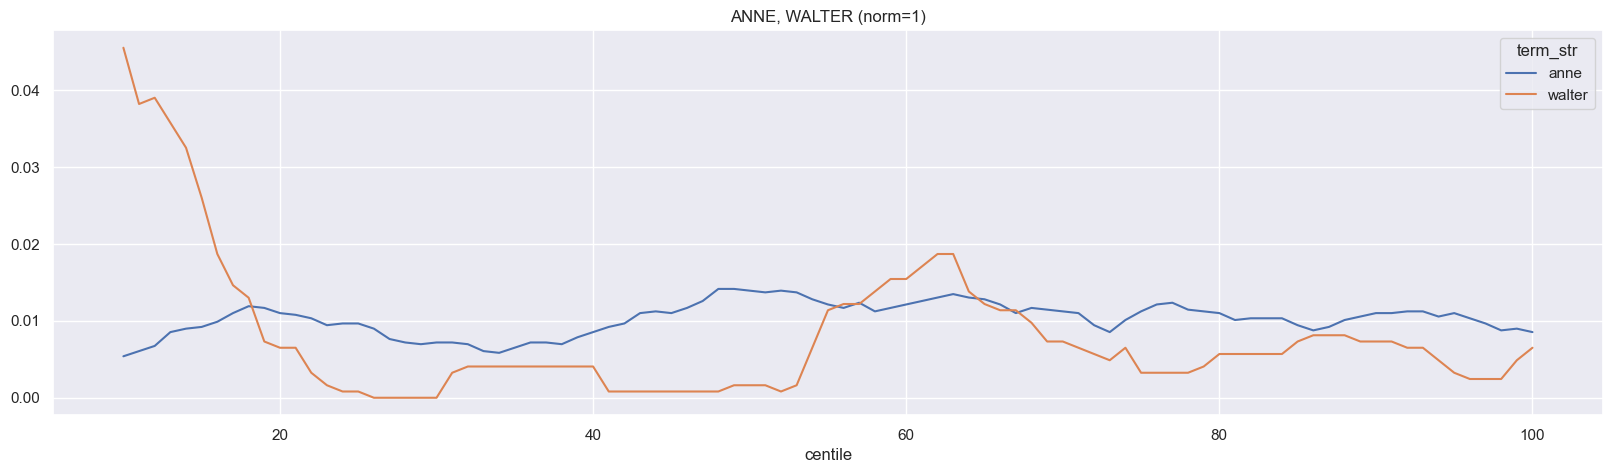

In [336]:
plot_words(['anne','walter'])

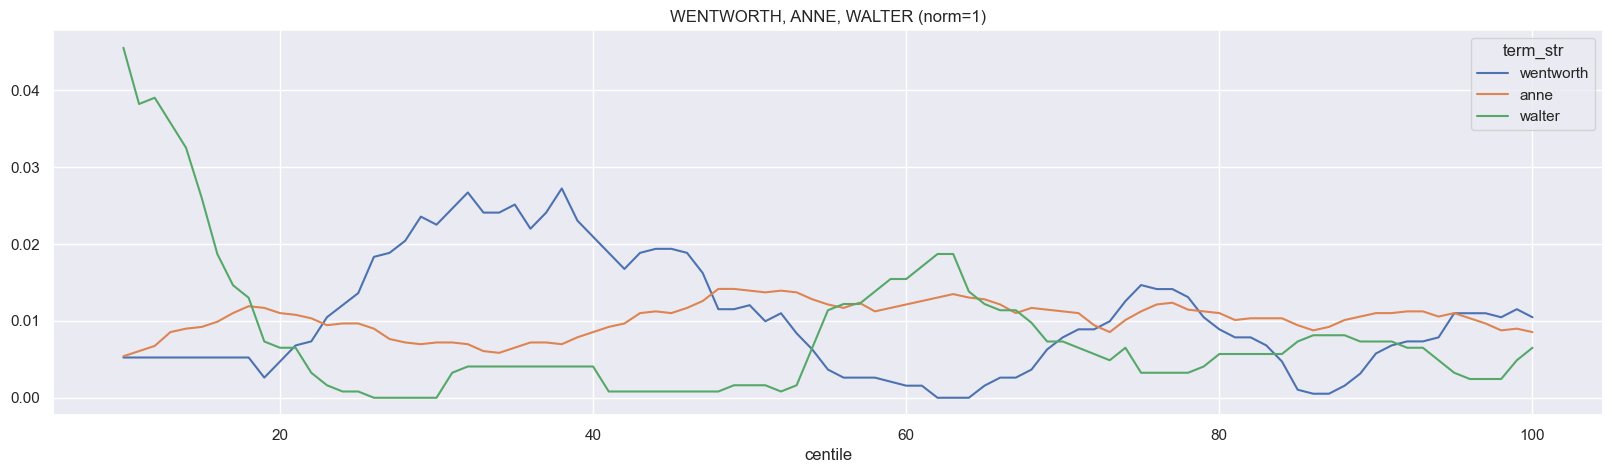

In [30]:
plot_words(['wentworth', 'anne', 'walter'])

In [31]:
q2 = lambda a, b: M[1][[a,b]].corr(method='kendall').iloc[0,1]

<Axes: title={'center': '0.09791689739872034'}, xlabel='anne', ylabel='mary'>

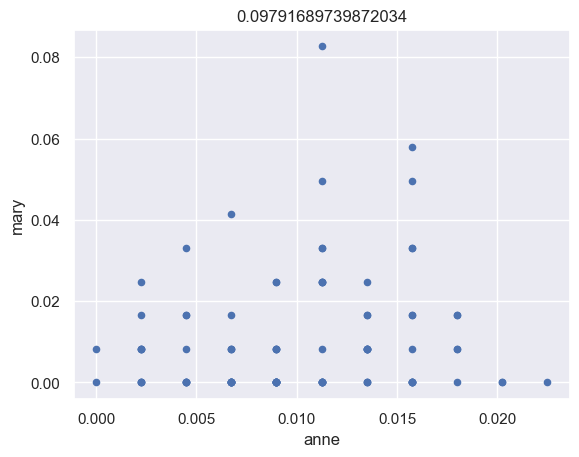

In [32]:
M[1].plot.scatter('anne','mary', title=q2('anne','mary'))

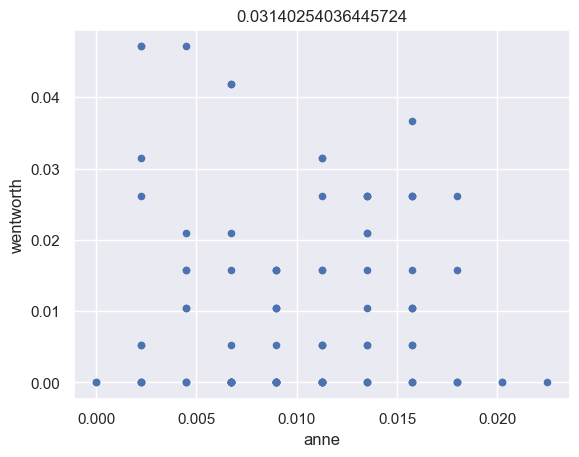

In [33]:
M[1].plot.scatter('anne','wentworth', title=q2('anne','wentworth'));

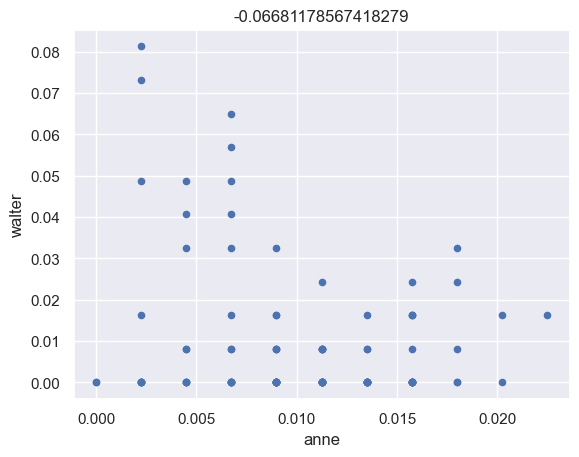

In [34]:
M[1].plot.scatter('anne','walter', title=q2('anne','walter'));

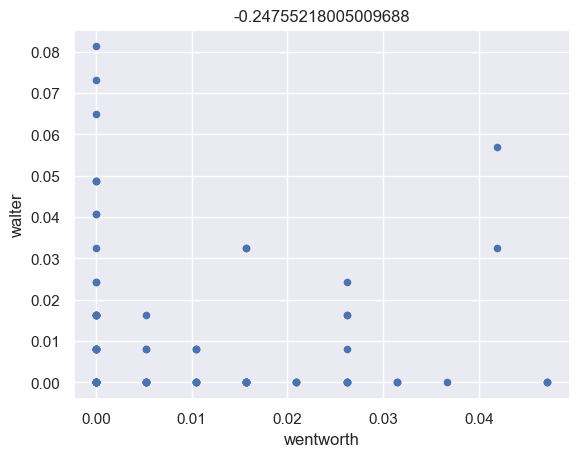

In [35]:
M[1].plot.scatter('wentworth','walter', title=q2('wentworth','walter'));

In [41]:
M[1]

term_str,1,10,11,12,13,14,15,16,17,1760,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
centile,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,1.0,...,0.0,0.000000,0.0,0.071429,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Select Significant Words

In [178]:
V['df'] = M[0].astype('bool').sum()
V['dfidf'] = (V.df/100) * np.log2(100/V.df)

In [179]:
V.sort_values('dfidf')

,n,p,i,df,dfidf
term_str,,,,,
the,3326,0.039936,4.646162,100.0,0.000000
all,527,0.006328,7.304075,100.0,0.000000
at,533,0.006400,7.287743,100.0,0.000000
with,653,0.007841,6.994795,100.0,0.000000
but,661,0.007937,6.977228,100.0,0.000000
...,...,...,...,...,...
kellynch,73,0.000877,10.155910,37.0,0.530729
where,51,0.000612,10.673309,37.0,0.530729
interest,43,0.000516,10.919470,37.0,0.530729


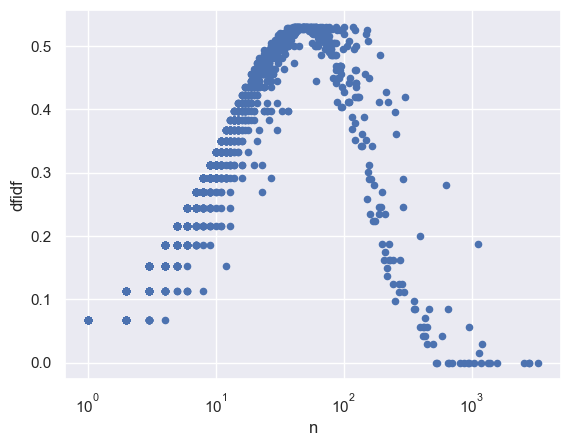

In [181]:
V.plot.scatter('n', 'dfidf', logx=True);

In [202]:
V[V.dfidf == 0]

,n,p,i,df,dfidf
term_str,,,,,
the,3326,0.039936,4.646162,100.0,0.0
to,2782,0.033404,4.903828,100.0,0.0
and,2781,0.033392,4.904346,100.0,0.0
of,2565,0.030799,5.020991,100.0,0.0
a,1591,0.019104,5.710016,100.0,0.0
in,1382,0.016594,5.913193,100.0,0.0
was,1335,0.016030,5.963110,100.0,0.0
had,1187,0.014253,6.132630,100.0,0.0
it,1036,0.012440,6.328926,100.0,0.0


In [206]:
V[V.dfidf > .5].head(20)

,n,p,i,df,dfidf
term_str,,,,,
we,154,0.001849,9.078948,48.0,0.508269
charles,152,0.001825,9.097807,42.0,0.525646
sir,149,0.001789,9.126566,45.0,0.518401
walter,123,0.001477,9.403220,42.0,0.525646
russell,118,0.001417,9.463091,38.0,0.530453
musgrove,111,0.001333,9.551319,48.0,0.508269
bath,101,0.001213,9.687523,45.0,0.518401
louisa,100,0.001201,9.701878,37.0,0.530729
father,94,0.001129,9.791146,42.0,0.525646


In [194]:
thresh = V.loc['anne'].dfidf
thresh

0.02856341874632618

In [195]:
V2 = V.loc[V.dfidf >= thresh].index

In [196]:
V2

Index(['her', 'i', 'he', 'his', 'you', 'have', 'been', 'him', 'could', 'anne',
       ...
       'judiciously', 'rut', 'dungcart', 'deposited', '11', 'resettled',
       'thence', 'gainer', 'painfully', 'finis'],
      dtype='object', name='term_str', length=5985)

## Create a Correlation Matrix

In [283]:
def correlated_word_pairs(model, vocab):
    Q = model[vocab].corr().stack().sort_values().to_frame('c')
    Q.index.names = ['w0', 'w1']
    Q = Q.query('w0 != w1')
    return Q

In [310]:
def corr_words(pairs, word, n=10):
    try:
        C = pairs.loc[word].c
    except KeyError as e:
        print(f"The word '{word}' is not found in the vocabulary.")
        return None
    pd.concat([C.head(n), C.tail(n)]).plot.barh(title=word.upper(), figsize=(5, n))
    plot_words([word, C.idxmax(), C.idxmin()])

In [280]:
Q1 = correlated_word_pairs(M[0], V2)

In [282]:
Q1

c
w0        w1                 
my        their     -0.400965
their     my        -0.400965
is        by        -0.397690
by        is        -0.397690
their     i         -0.395065
...                       ...
christian ascending  1.000000
          cupboards  1.000000
          chairs     1.000000
cupboards christian  1.000000
christian courting   1.000000

[35814240 rows x 1 columns]

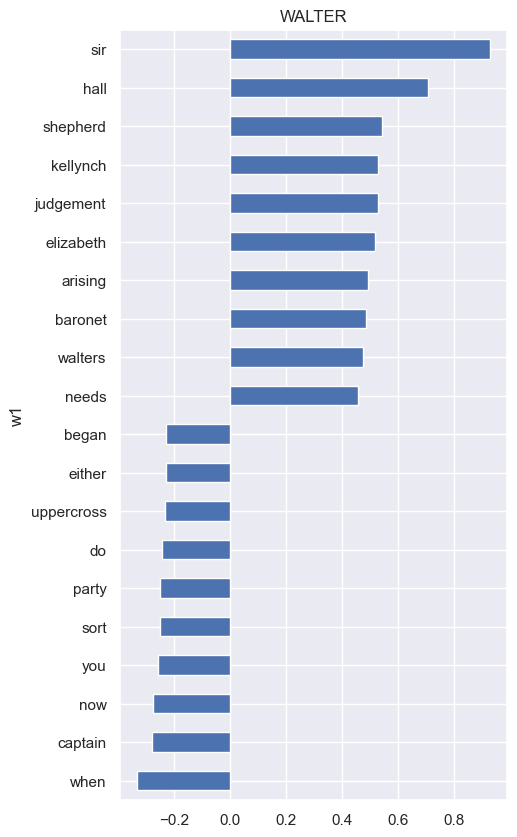

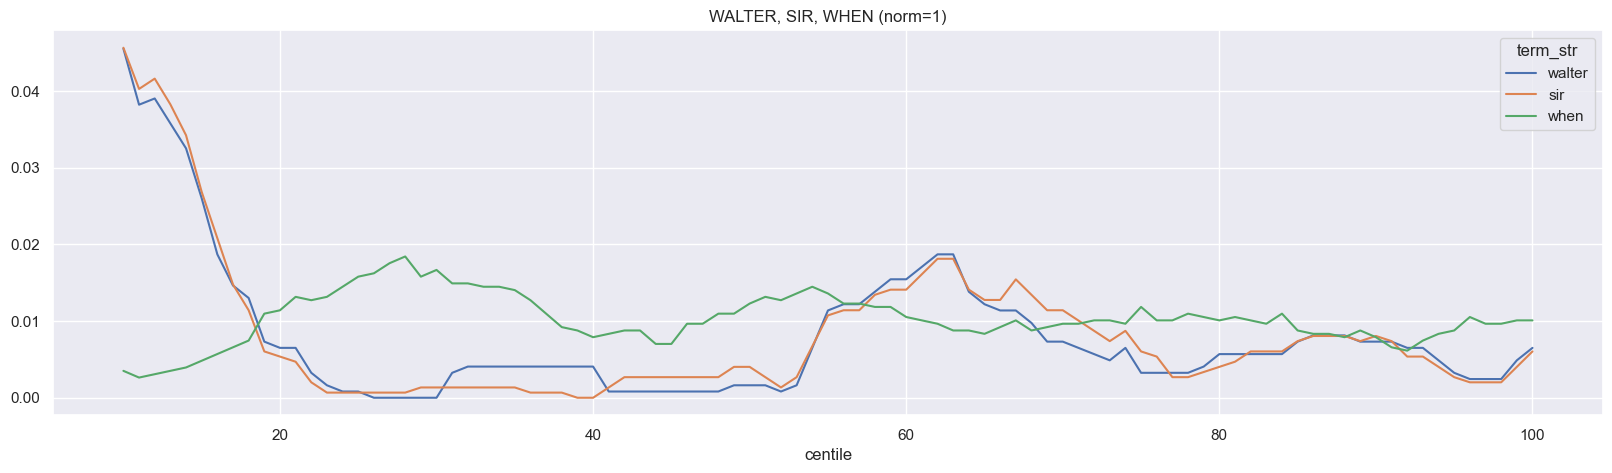

In [299]:
corr_words(Q1, 'walter')

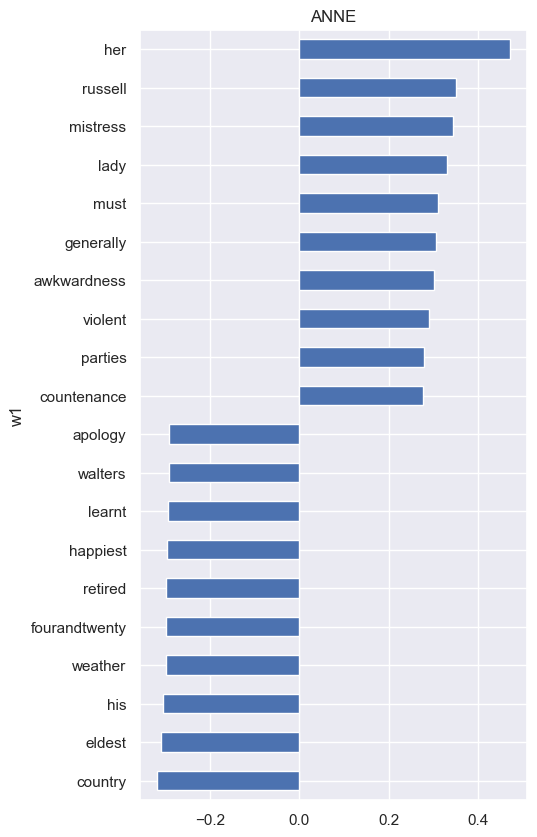

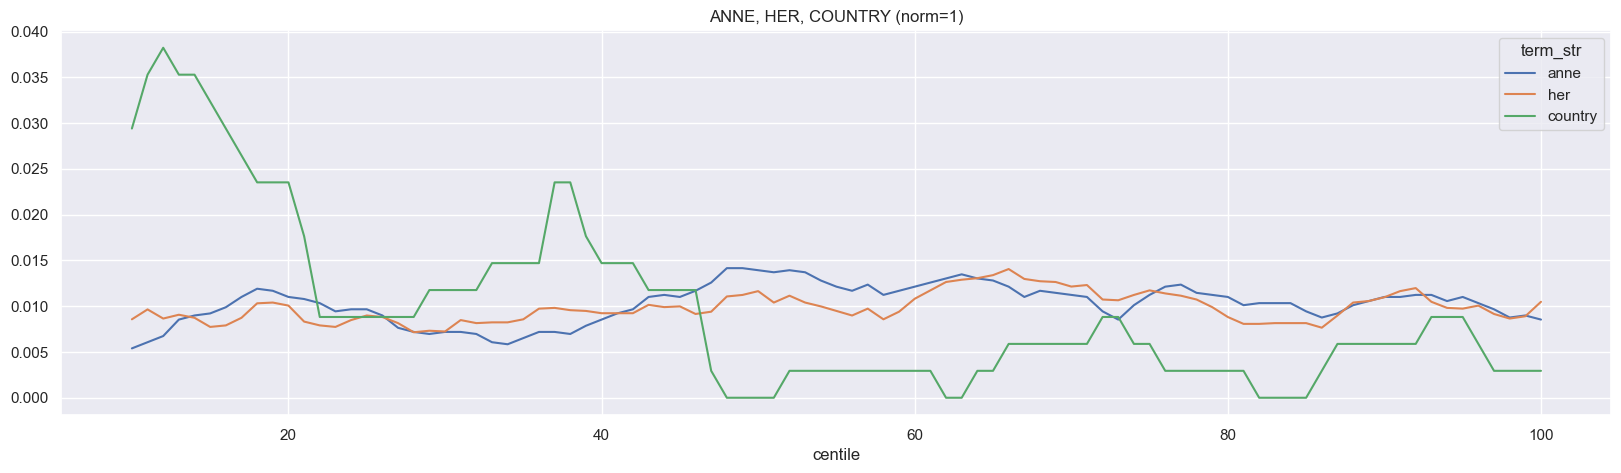

In [300]:
corr_words(Q1, 'anne')

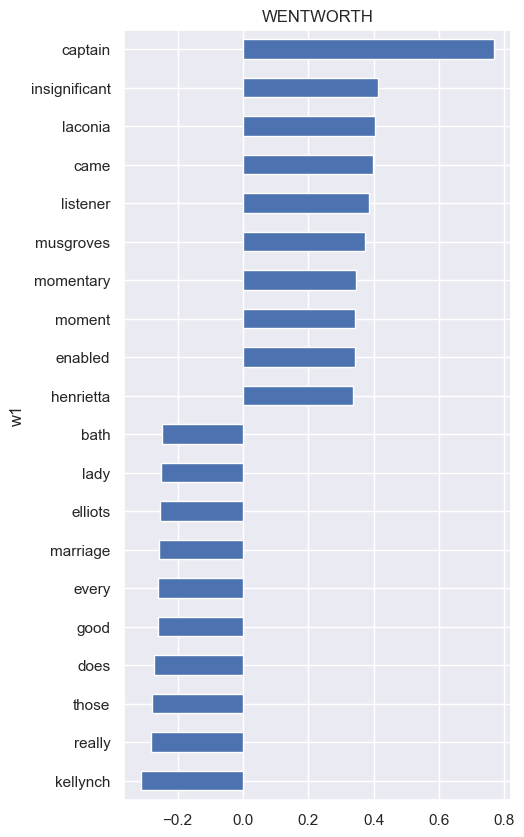

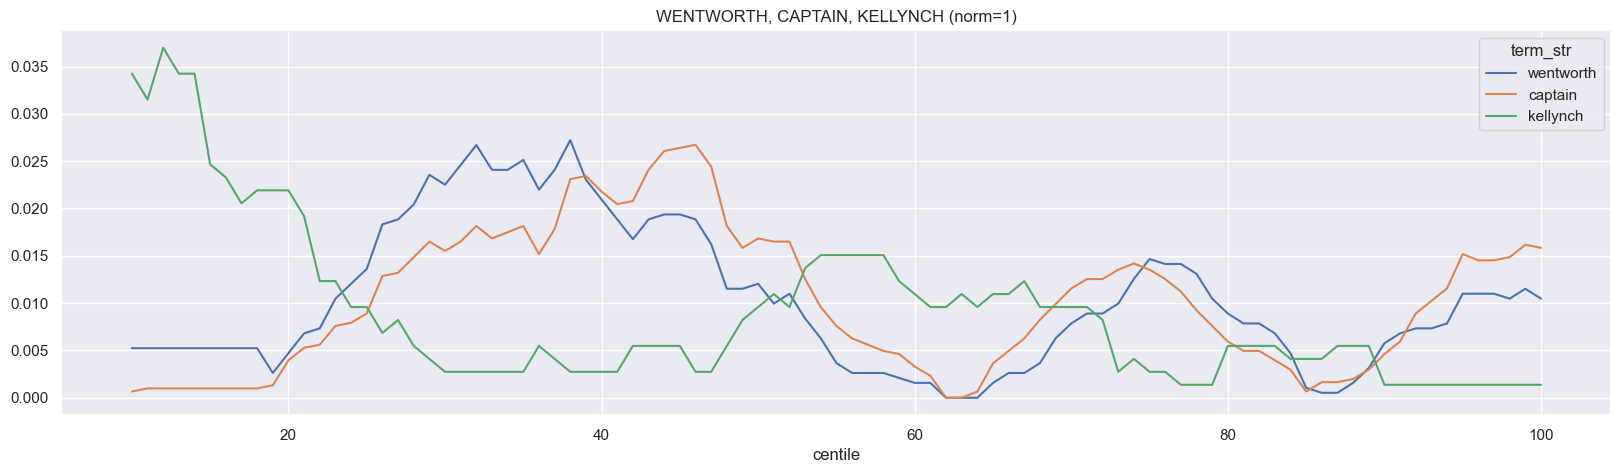

In [301]:
corr_words(Q1, 'wentworth')

## Play

In [307]:
Q2 = correlated_word_pairs(M[1], V[V.dfidf > .5].index)

In [308]:
Q2

,,c
w0,w1,
friend,house,-0.328923
house,friend,-0.328923
few,friend,-0.313483
friend,few,-0.313483
moment,known,-0.311135
...,...,...
kellynch,sir,0.572819
charles,henrietta,0.627372
henrietta,charles,0.627372


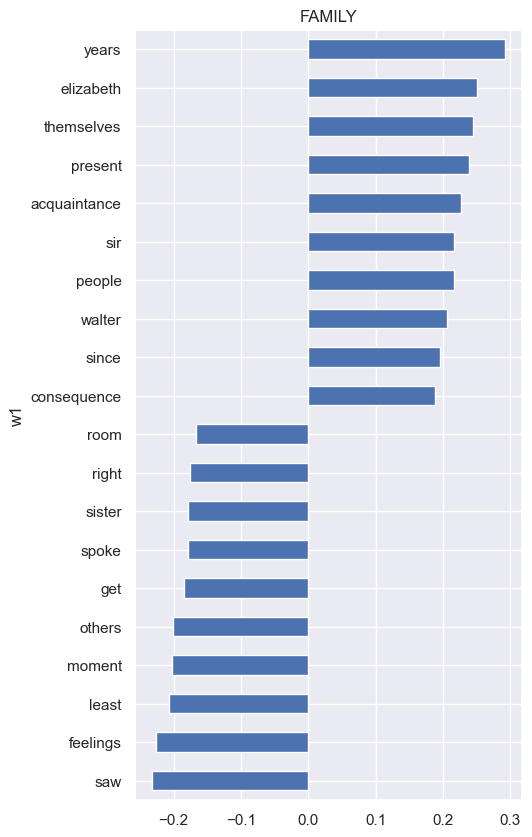

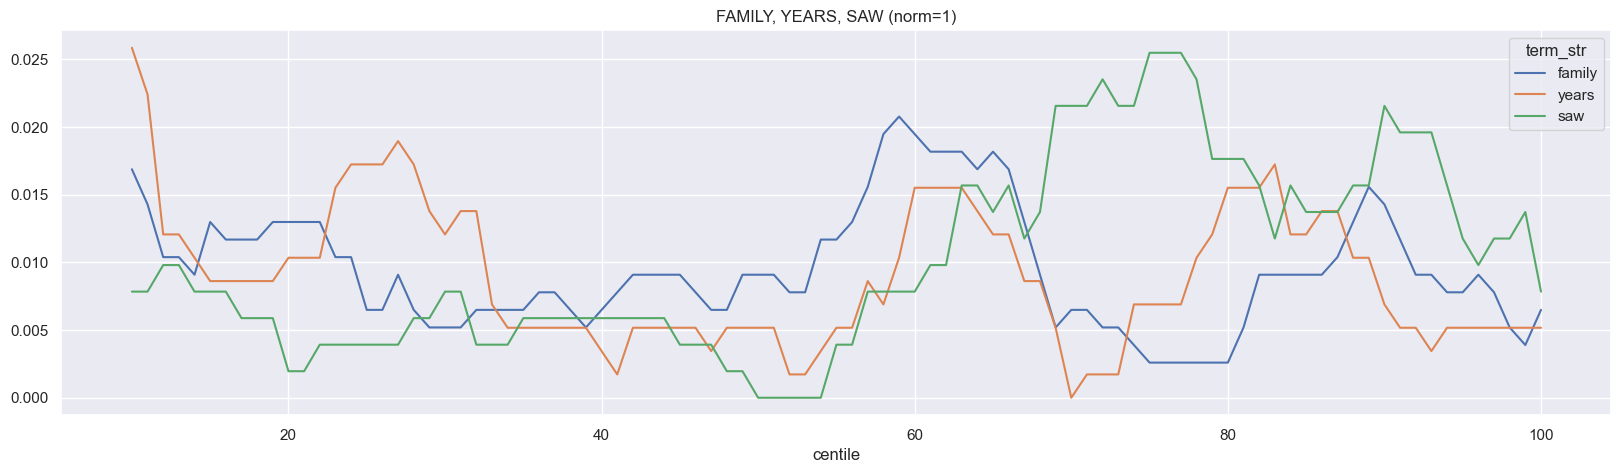

In [316]:
corr_words(Q2, 'family')